# Problem Set 7

In [50]:
import numpy as np    
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import fsolve
from scipy.optimize import minimize

Problem 1 <br>
a.Say, you have the equation system, given by x+0.5y-2=0 and 4x+5y=2. Write this upin matrix notation and solve the system using matrix inversion in Python. <br> b.Try to do the same with the following equation system: x+2y -4= 0 and 5x+10y = 2. What happens? <br>c.The function f(a) is implicitly defined by the x that solves the equation ax - exp(x) = 0. Define the function using a call to a solver from the Scipy library and plot the function.<br> d.The function f(a) is implicitly defined by the x that maximizes exp(-0.5x^2)+ax. Definethe function using a call to a minimizer from the Scipy library and plot the function.

In [51]:
e = np.array([[1,0.5],[4,5]])
sol = np.array([[2],[2]])
x = np.linalg.inv(e) @ sol
print(x)
print(e @ x)

[[ 3.]
 [-2.]]
[[2.]
 [2.]]


In [52]:
e = np.array([[1,2],[5,10]])
sol = np.array([[4],[2]])
x = np.linalg.inv(e) @ sol
print(x)
print(e @ x) 

[[ 6.48518346e+16]
 [-3.24259173e+16]]
[[0.]
 [0.]]


We can see that in this case the solution provided doesn't give the right result. 

[-276.10007928]


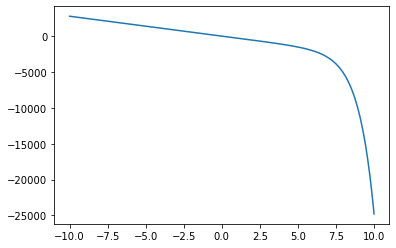

In [53]:
from scipy.optimize import fsolve
xs = np.linspace(-10,10,1000)
f = lambda x,a =0: a*x - np.exp(x) 
a = fsolve(f, 0)
print(a)

plt.plot(xs,f(xs,a)) ; plt.show()

[1.34217728e+08]


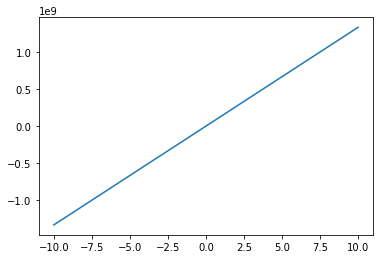

In [54]:
# f = lambda x,a=1: np.exp(-0.5*np.power(x,2))+a*x
# x = np.linspace(0.1,10,90) ; ast = np.arange(0.1,1,0.01)  ; anse = []
# for a in range(len(ast)):
#     ans = minimize(lambda x,a : -f(x,a),0).x
#     anse.append(ans)

# plt.plot(x, f(x,anse))

xs = np.linspace(-10,10,1000)
f = lambda x,a =0: np.exp(-0.5*np.power(x,2))+a*x
a = fsolve(f, 0)
print(a)

plt.plot(xs,f(xs,a)) ; plt.show()

[1.34217728e+08]
[-0.]
[0.]


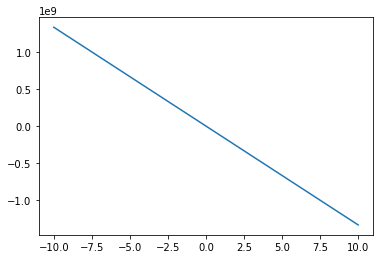

In [55]:
def f(y,a = 0):
    return -(np.exp(-0.5*np.power(y,2))+a*y)
a=fsolve(f,0)
print(a)
print(f(a))
plt.plot(xs, f(xs,a))

b = minimize(f,0).x
print(b)

[0. 0.]
-1.0


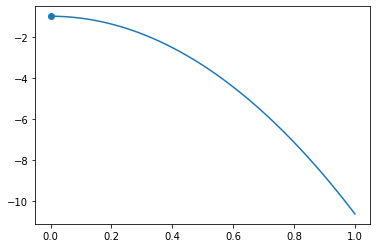

In [56]:
import scipy.optimize as optimize

a = np.linspace(0,10,100) ; x = np.linspace(0,1,100) ; pa = [a,x]

def f(params):
    # print(params)  # <-- you'll see that params is a NumPy array
    a = params[0] ; x = params[1] # <-- for readability you may wish to assign names to the component variables
    return -(np.exp(-0.5*np.power(x,2))+a*x)

initial_guess = [0, 0]
result = optimize.minimize(f, initial_guess, method = 'BFGS')
if result.success:
    fitted_params = result.x
    print(fitted_params)
    print(result.fun)
else:
    raise ValueError(result.message)

plt.plot(x, f(pa))
plt.scatter(result.x[0], f(result.x))

## Problem 2
In this problem, we are going to work with two utility functions: $$u1 = 0.6 \times log(x) + 0.4 \times log(y) $$
$$u2 = y + 1/(1+\frac{1}{e} ) \times x^{(1+ \frac{1}{e} )} $$
Derive a demand curve (for good x as a price of x for each of the utility functions). Assume that income = 10 and the price of good y is 1. <br> We will consider a price change from 1 to 2 on good x. <br>
Our problem concerns how to measure the cost to the consumer (the welfare consequences) of the price change. (Thereason this is not trivial is that the consumer can adjust demand, right!)

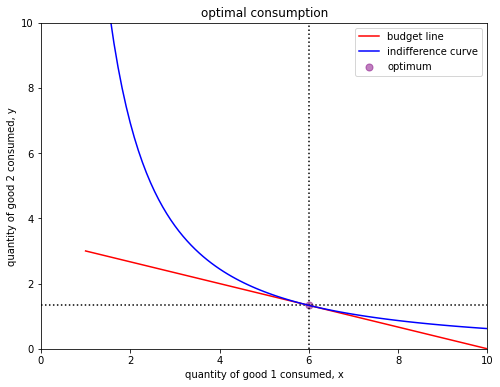

In [57]:
def utility_1(x, y): 
    # -u(x, y) since we minimise later
    return - 0.6*np.log(x) - 0.4*np.log(y)

def utility_budget_1(x, mylist):
    income = mylist[0] ; price_x = mylist[1] ; price_y = mylist[2]
    y = (income - price_x*x)/price_y
    return utility_1(x, y)
    
def demand_1(income, price_x, price_y): 
    x = opt.minimize(utility_budget_1, 0.1, method = 'Nelder-Mead', args = ([income, price_x, price_y], )).x
    y = (income - price_x*x)/price_y
    return x, y

def indiff_dist_1(y, mylist): 
    x = mylist[0] ; utility_level = mylist[1]
    utility_achieved = utility_1(x, y)
    return utility_achieved - utility_level

def indifference_1(x, u_bar):
    result = opt.newton(indiff_dist_1, 0.1, args = ([x, u_bar], ))
    return result

def indirect_utility_1(income, price_x, price_y): 
    x, y = demand_1(income, price_x, price_y)
    return utility_1(x, y)

# initialise quantiites of good 1 (x), income (I), and prices of the two goods
x = np.linspace(1, 10, 100) ; I = 10 ; p1 = 1 ; p2 = 3

# get indirect utility curve here
utility_level = indirect_utility_1(I, p1 , p2)
y = np.zeros((100, 1))

for element in range(len(x)):
    y[element] = indifference_1(x[element], utility_level)

# plot the consumer's budget and indifference curve
plt.figure(figsize = (8, 6))
plt.plot(x, I/p2 - x*p1/p2, color = 'red', label = 'budget line')
plt.plot(x, y, color = 'blue', label = 'indifference curve') 

# identify optimum
x_star = demand_1(I, p1, p2)[0] ; y_star = demand_1(I, p1, p2)[1]
plt.scatter(x_star, y_star, s=50, alpha=0.5, color = 'purple', label = 'optimum')
plt.vlines(x_star, 0, 35, linestyles = 'dotted', color = 'k')
plt.hlines(y_star, 0, 30, linestyles = 'dotted', color = 'k')

plt.xlabel('quantity of good 1 consumed, x') ; plt.ylabel('quantity of good 2 consumed, y')
plt.title('optimal consumption') ; plt.legend(loc = 'upper right')
plt.ylim(0, 10) ; plt.xlim(0, 10) ; plt.show()

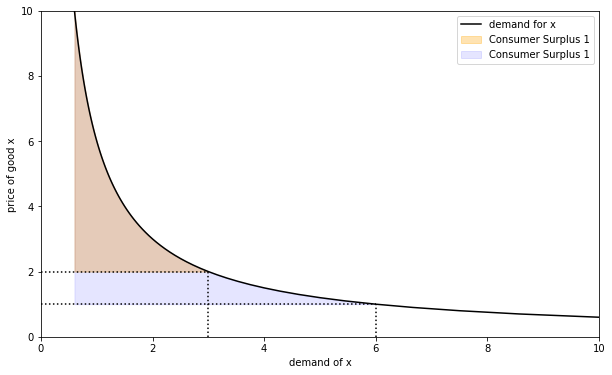

In [58]:
n = 100
prices_x = np.linspace(0.1, 10, n) ; price_y = 1 ; income = 10
demandx = np.zeros(n) ; demandy = np.zeros(n)

def demandX(pricex):
    for price in range(n):
        demandx[price], demandy[price] = demand_1(income, prices_x[price], price_y)
    return demandx

demandx = demandX(prices_x)

plt.figure(figsize = (10, 6))
plt.plot(demandx,prices_x, '-k', label = 'demand for x')

idx1 = np.argwhere(prices_x == 1) ; idx2 = np.argwhere(prices_x == 2)
d1 = demand_1(income, prices_x[idx1], price_y) ; d2 = demand_1(income, prices_x[idx2], price_y) #does it mean that demand is the same ?
plt.vlines(d1[0], 0, 1, color = 'black', linestyle = 'dotted') ; plt.hlines(1, 0, 6, color = 'black', linestyle = 'dotted') #why do you have the dotter lines ?
plt.vlines(d2[0], 0, 2, color = 'black', linestyle = 'dotted') ; plt.hlines(2, 0, 3, color = 'black', linestyle = 'dotted')

# fill_between

plt.fill_between(demandx, 2, prices_x, where = (prices_x >= 1) & (prices_x >=2),
                 color = 'orange', alpha = 0.3, label = "Consumer Surplus 1")
plt.fill_between(demandx, 1, prices_x, where = (prices_x >= 1),
                 color = 'blue', alpha = 0.1, label = "Consumer Surplus 1")


plt.xlabel('demand of x') ; plt.ylabel('price of good x') ; plt.legend()
plt.ylim(0, 10) ; plt.xlim(0, 10) ; plt.show()

b.Compute the “equivalent variation” for both utility functions. (How much would theconsumer be willing to pay to not experience the price increase?)

c.Compute the “compensating variation” for both utility functions. (How much do youneed to compensate the consumer for the price change to keep her equally happy?)